# Data Preparation & Exploration

## Introduction

PorteSeguro competition의 data에 대해 좋은 insight를 얻기 위한 노트북입니다. Modeling을 위한 data 준비에 몇 가지 tips, tricks을 제공합니다. 이 노트북은 다음과 같은 sections로 구성되어 있습니다.

 - Visual inspection of your data
 - Defining the metadata
 - Descriptive statistics
 - Handling imbalanced classes
 - Data quality checks
 - Exploratory data visualization
 - Feature engineering
 - Feature selection
 - Feature sacling


### Loading packages, data

원 노트북에서는 sklearn.preprocessing.Imputer를 사용하였지만 해당 클래스는 sci-kit learn 0.22버전에서 삭제되었습니다. 대신 sklearn.impute.SimpleImputer 클래스를 사용합니다.

https://thebook.io/007022/ch04/01/03-01/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

## Visual inspection of your data

### Data at first sight

다음은 대회 데이터 설명 중 일부입니다.

 - 비슷한 그룹에 속한 features는 ind, reg, car, calc 등의 태그가 붙어있다.
 - Feature 이름 중 bin은 binary features를, cat은 categorical feature를 의미한다.
 - 둘 다 해당하지 않으면 continuous 또는 ordinal feature이다.
 - -1은 missing value이다.
 - Target은 보험 청구가 접수되었는지 여부이다.
 

우선 데이터를 간단하게 봅시다.

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


다음과 같은 내용을 알 수 있습니다.

 - Binary variables
 - Categorical variables => 각 value가 integer로 저장됨
 - 나머지 varibales는 int or float
 - -1은 missing value
 - ID, target variable 존재
 
다음은 data의 shape입니다. 중복된 data가 없음을 알 수 있습니다.

In [5]:
print(train.shape)

train.drop_duplicates()
print(train.shape)

(595212, 59)
(595212, 59)


Test set의 shape은 다음과 같습니다. Variable 1개가 부족한데 이는 target이므로 상관 없습니다.

In [6]:
test.shape

(892816, 58)

총 14개의 categorical varibale이 존재합니다. 추후 이들에 대해서는 dummy variable을 만들어줍니다.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

모든 missing value가 -1로 대체되어 Null을 가지는 feature가 없습니다.

## Defining the metadata

### Metadata

Data 관리를 좀 더 편리하게 하기 위해(분석, 시각화, 모델링...), variables에 대한 meta-information을 저장합니다. 저장하게 되는 내용들은 다음과 같습니다.

 - Role : input, ID, target
 - level : nominal, interval, ordinal, binary
 - keep : True or False
 - dtype : int, float, str
 


In [8]:
data = []

for f in train.columns:
    #Role을 정의합니다
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
        
    #Level을 정의합니다
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == 'float64':
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
        
    #ID를 제외한 모든 variable의 keep을 True로 둡니다
    keep = True
    if f == 'id':
        keep = False
    
    #Data type을 정의합니다
    dtype = train[f].dtype
    
    #Variable의 metadata를 가지고 있는 dictionary를 생성합니다.
    f_dict = {
        'varname' : f,
        'role' : role,
        'level' : level,
        'keep' : keep,
        'dtype' : dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns = ['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace = True)

In [9]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


위와 같이 varibale의 특성을 meta라는 dataframe으로 만들어 정리했습니다. 예를 들어, 모든 nominal variable 중 keep = True인 variable만 뽑아보겠습니다.

In [10]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

다음은 각 role, level에 해당하는 variable의 개수입니다.

In [11]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive statistics

Dataframe에 describe 메서드를 적용해서 각 feature들의 평균, 분산 등을 구할 수 있습니다만, categorical feature 또는 id에 적용하는 것은 의미가 없습니다. Categorical feature의 visualization은 추후에 다루도록 하죠.

위에서 feature들의 metadata를 만들어뒀기 때문에 describe 메서드로 의미있는 정보를 뽑아낼 수 있는 feature들을 쉽게 뽑아낼 수 있습니다.

### Interval variables

In [12]:
v = meta[(meta.level == 'interval') & (meta.keep)].index

train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


reg variables
 - ps_reg_03만 missing value를 가지고 있음
 - 01~03까지 min-max range가 다름. Classifier에 따라 필요 시 scaling해야 할 수도 있음(MinMaxscaler, StandardScaler...)
 
car variables
 - ps_car_12, ps_car_15는 missing value를 가지고 있음
 - 이 또한 min-max range가 다름
 
calc variables
 - Missing value 없음
 - max값이 0.9로 정해져있는 것 같음
 - 01~03 모두 비슷한 distribution을 가지고 있음(mean, std)
 
종합해보면, feature들의 min-max range가 다소 작은 것을 확인할 수 있습니다. Data의 익명화를 위해 이미 transformation(ex. log)이 적용된 data일 수도 있겠네요.

### Ordinal variables

In [13]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index

train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


 - ps_car_11만 missing value를 가짐
 - 이 또한 모두 min-max range가 다르기 때문에 필요 시 scaling 필요

### Binary variables

In [14]:
v = meta[(meta.level == 'binary') & (meta.keep)].index

train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 - target은 0 or 1인데, 평균이 0.036이라는 것은 심하게 imbalance되어있다는 것을 의미함
 - 대부분 data의 target이 0임을 알 수 있음

## Handling imbalabced classes

대부분의 target이 0에 쏠려있는 현상을 확인했습니다. 이 문제를 해결하기 위해 2가지의 방법을 사용할 수 있습니다.
 - target = 1인 경우를 oversampling
 - target = 0인 경우를 undersampling
 
여기서는 undersampling을 시도해보도록 하겠습니다.

In [15]:
desired_apriori = 0.10

#Target value에 따라 index를 분리합니다
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

#분리된 index의 개수를 확인합니다
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

#Undersampling rate를 계산하고, 그에 따라 undersampling된 target = 0인 data의 개수를 확인합니다.
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)

print("Rate to undersample records with target = 0 : {}".format(undersampling_rate))

print("# of records with target = 0 after undersampling : {}".format(undersampled_nb_0))

#Undersampled 된 개수에 맞게 랜덤하게 데이터를 선택합니다.
undersampled_idx = shuffle(idx_0, random_state = 42, n_samples = undersampled_nb_0)

#선택된 데이터와 target = 1인 데이터의 인덱스를 합치고, dataframe화합니다.
idx_list = list(undersampled_idx) + list(idx_1)
train = train.loc[idx_list].reset_index(drop = True)

Rate to undersample records with target = 0 : 0.34043569687437886
# of records with target = 0 after undersampling : 195246


## Data Quality Checks

### Checking missing values
모든 missing value는 -1로 나타납니다


In [16]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print("Variable {} has {} records ({:.2%}) with missing values".format(f, missings, missings_perc))

print("In total, there are {} variables with missing values".format(len(vars_with_missing)))

Variable ps_ind_02_cat has 100 records (0.05%) with missing values
Variable ps_ind_04_cat has 50 records (0.02%) with missing values
Variable ps_ind_05_cat has 2317 records (1.07%) with missing values
Variable ps_reg_03 has 38780 records (17.88%) with missing values
Variable ps_car_01_cat has 57 records (0.03%) with missing values
Variable ps_car_02_cat has 1 records (0.00%) with missing values
Variable ps_car_03_cat has 148997 records (68.68%) with missing values
Variable ps_car_05_cat has 96192 records (44.34%) with missing values
Variable ps_car_07_cat has 4495 records (2.07%) with missing values
Variable ps_car_09_cat has 234 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15534 records (7.16%) with missing values
In total, there are 12 variables with missing values


 - ps_car_03_cat, ps_car_05_cat은 매우 많은 missing value를 가지고 있습니다(69%, 44%) 이 feature는 사용하지 못할 것 같습니다.
  - 다른 categorical feature에 대해서는 missing value를 그대로 둬도 될 것 같습니다.
  
  
 - pe_reg_03(continuous)는 18%의 missing value를 가지고 있습니다. 평균으로 대체합니다.
 - ps_car_11(ordinal)은 5개의 missing value를 가지고 있습니다. mode로 대체합니다.
 - ps_car_12(continuous)는 1개의 missing value를 가지고 있습니다. 평균으로 대체합니다.
 - ps_car_14(continuous)는 7%의 missing value를 가지고 있습니다. 평균으로 대체합니다.

In [17]:
#Missing value가 매우 많은 feature를 drop합니다.
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace = True, axis = 1)
meta.loc[(vars_to_drop), 'keep'] = False #Metadata의 keep을 update합니다.

#결측값은 평균 또는 mode로 대체합니다. 원 kernal에서는 sklearn.preprocessing.Imputer 메서드를 사용하였지만 현재 버전에서는 sklearn.impute.SimpleImputer로 대체되었습니다. 이를 사용합니다.
mean_imp = SimpleImputer(missing_values = -1, strategy = 'mean')
mode_imp = SimpleImputer(missing_values = -1, strategy = 'most_frequent')

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### Checking the cardinality of the categorical variables

Cardinality는 feature내 unique value의 개수입니다. 추후 categorical feature로부터 dummy variables를 만들기 때문에 큰 cardinality를 갖는 feature가 있는지 확인해야 합니다. 이런 feature들이 더 많은 dummy variable을 야기할 수 있기 때문에 다르게 handling해야 합니다.

In [18]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print("Variable {} has {} distinct values".format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


ps_car_11이 유독 많은 distinct value를 가지고 있는 것을 확인할 수 있습니다.

#### Mean(target) encoding
Categorical feature를 encoding하는 방법으로는 one-hot encoding, label encoding 등이 있지만 조금 더 정교한 방법으로 mean encoding(target encoding)이 있습니다. 앞선 두 방법이 단순이 category를 구분하는 데 그쳤다면, mean encoding 방식은 categorical feature를 가지고 target과의 통계적 연산을 하는 것입니다. Categorical label 값에 따른 target의 평균은 label에 따라 다를 수 있습니다. 이러한 값으로 encoding하면 categorical feature를 target과 연관성이 있는 distinct value로 encoding할 수 있다는 것입니다. 해당 방법에 대해 잘 정리된 글 2개를 링크로 첨부합니다.
https://dailyheumsi.tistory.com/120
https://zzsza.github.io/data/2018/09/08/feature-engineering/


#### Smoothing
나아가 아래 코드에서는 smoothing이라는 기법도 등장합니다. Train set과 test set의 label 분포가 극단적으로 다를 경우에는 train set을 이용한 mean encoding이 test set에서도 잘 동작한다고 보장할 수 없습니다. 예를 들어 train set에는 성공 data가 190개, 실패 data가 10개 존재하는데 test set에는 성공, 실패 data가 각각 100개씩 존재한다면 train set의 10개 실패 data가 test set의 100개 실패 data를 대표한다고 볼 수 없겠죠. 이를 해결하기 위해 smoothing을 사용합니다.

위 case에서 10개 실패 data의 평균을, 성공/실패 전체 평균에 조금 더 가깝게 만들어주는 방법이 smoothing입니다. 자세한 내용은 위 링크에 있으니 참고하시면 좋을 것 같습니다.

Smoothing 외에도 CV loop, Expanding mean 등 다양한 방법이 있다고 소개합니다. Mean encoding은 아무래도 target 정보를 가져오기 때문에 data leakage 문제가 발생할 수 있습니다. 이를 최대한 줄이면서 잘 encoding하는 방법들이라고 이해하면 될 것 같습니다.

*원작자의 code에서 data leakage가 일어날 수 있다는 지적이 있었습니다. 
https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
위 사람의 code가 해결할 수 있다고 하여 encoding, smoothing 부분은 oliver라는 사람의 code로 대체합니다.

다음 코드에서 smoothing은 link에 있는 paper의 연산 방식을 따릅니다.
https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf

각 parameter는 다음 의미를 가집니다.
  - trn_series : training categorical feature as a pd.Series
  - tst_series : test categorical feature as a pd.Series
  - target : target data as a pd.Series
  - min_samples_leaf (int) : minimum samples to take category average into account
  - smoothing (int) : smoothing effect to balance categorical average vs prior

In [31]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series = None,
                  tst_series = None,
                  target= None,
                  min_samples_leaf = 1,
                  smoothing = 1,
                  noise_level = 0):
    
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    
    temp = pd.concat([trn_series, target], axis = 1)
    
    #Target mean을 계산합니다.
    averages = temp.groupby(by = trn_series.name)[target.name].agg(['mean', 'count'])
    
    #Smoothing을 계산합니다.
    smoothing = 1 / (1 + np.exp(-(averages['count'] - min_samples_leaf) / smoothing))
    
    #모든 target data에 대해 average function을 적용합니다.
    prior = target.mean()
    
    #Count가 클 수록 full_avg가 더 적게 고려됩니다.
    averages[target.name] = prior * (1 - smoothing) + averages['mean'] * smoothing
    averages.drop(['mean', 'count'], axis = 1, inplace = True)
    
    #Averages를 trn/tst series에 적용합니다.
    ft_trn_series = pd.merge(trn_series.to_frame(trn_series.name),
                             averages.reset_index().rename(columns = {'index': target.name, target.name: 'average'}),
                             on = trn_series.name,
                             how = 'left')['average'].rename(trn_series.name + 'mean').fillna(prior)
    
    #pd.marge는 index를 저장하지 않기 때문에 restore해야합니다.
    ft_trn_series.index = trn_series.index
    
    ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),
                             averages.reset_index().rename(columns = {'index' : target.name, target.name : 'average'}),
                             on = tst_series.name,
                             how = 'left')['average'].rename(trn_series.name + 'mean').fillna(prior)
    ft_tst_series.index = tst_series.index
    
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)
    

In [32]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'],
                                            test['ps_car_11_cat'],
                                            target = train.target,
                                            min_samples_leaf = 100,
                                            smoothing = 10,
                                            noise_level = 0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis = 1, inplace = True)
meta.loc['ps_car_11_cat', 'keep'] = False
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis = 1, inplace = True)

Mean encoding, smoothing을 통해 ps_car_11_cat이라는, 104개의 distinct value를 가지는 categorical feature를 encoding하였습니다.

## Exploratory Data Visualization

### Categorical feature
지금부터는 categorical feature마다 target = 1인 고객의 비율을 시각화합니다.

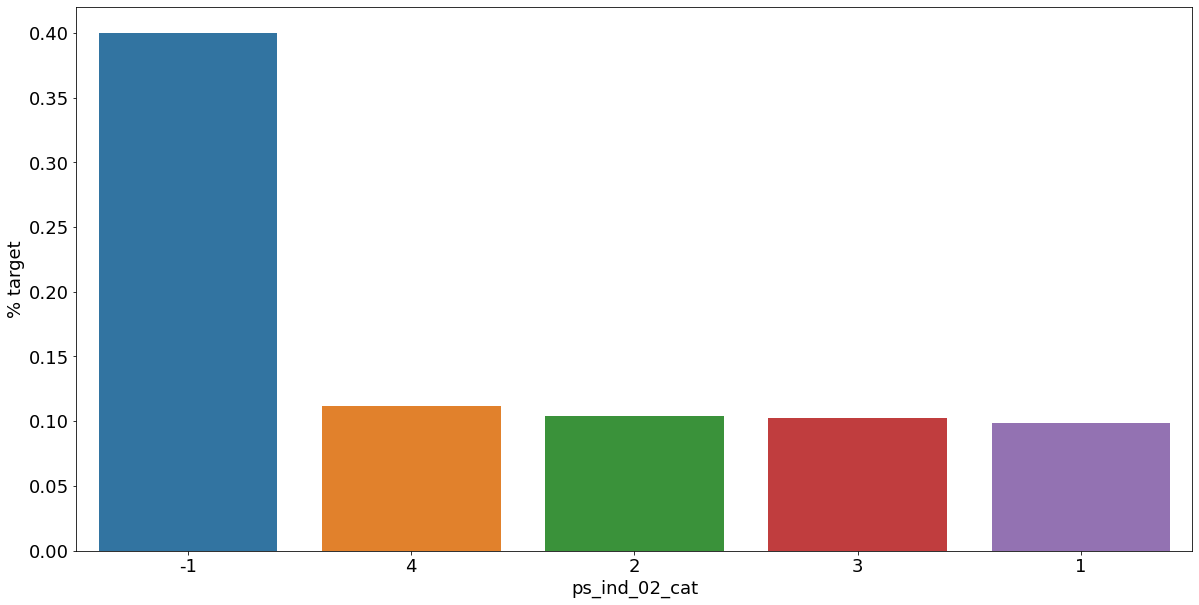

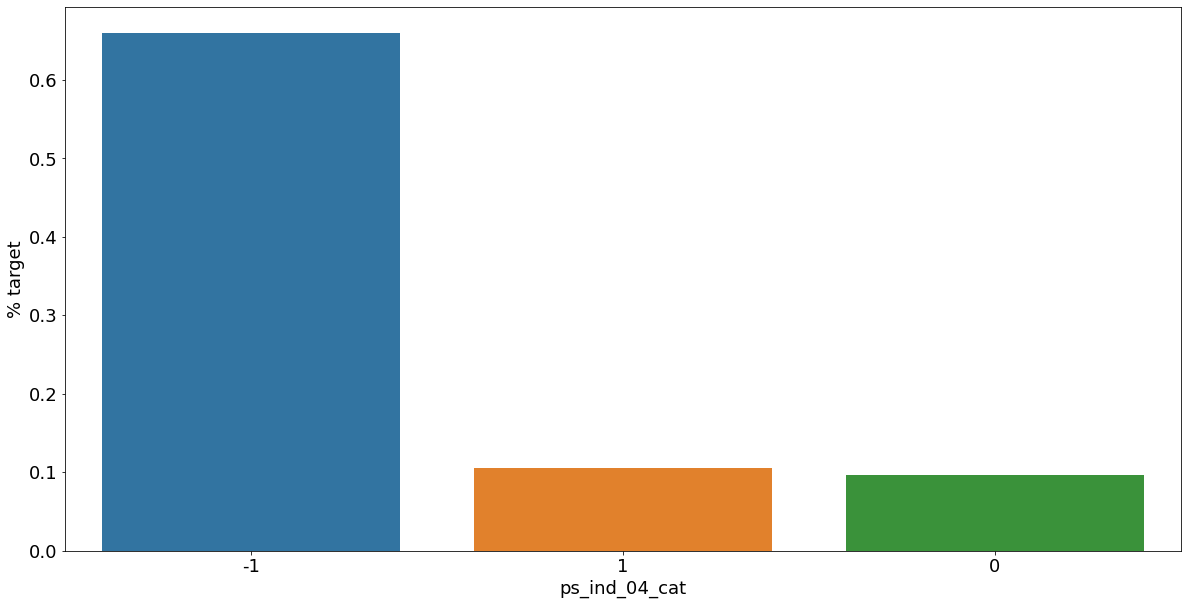

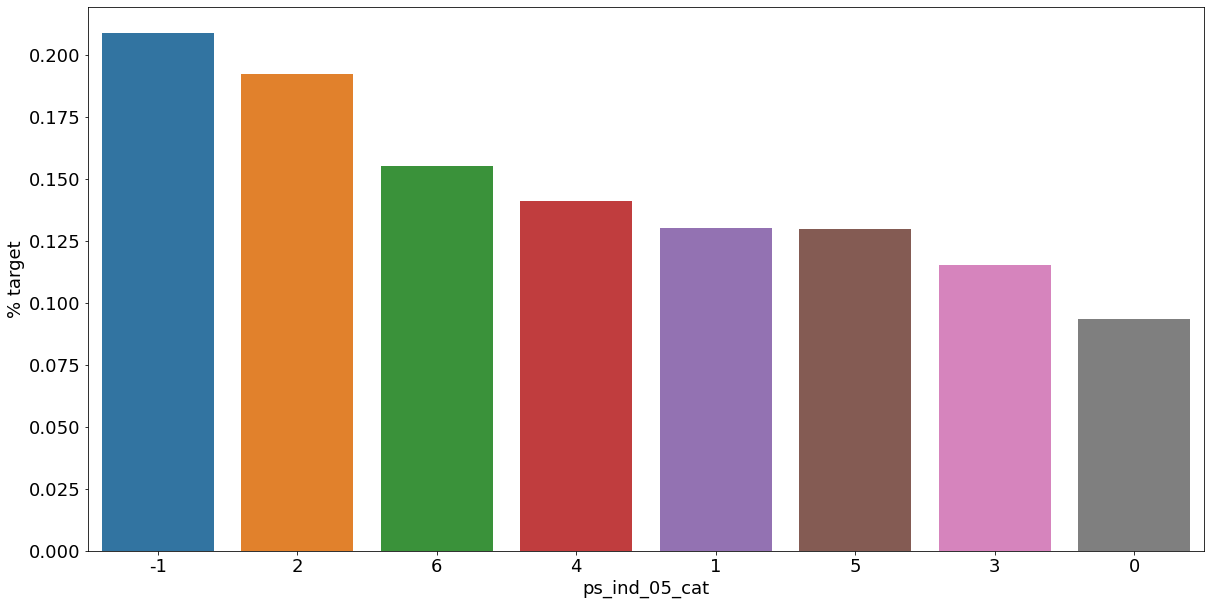

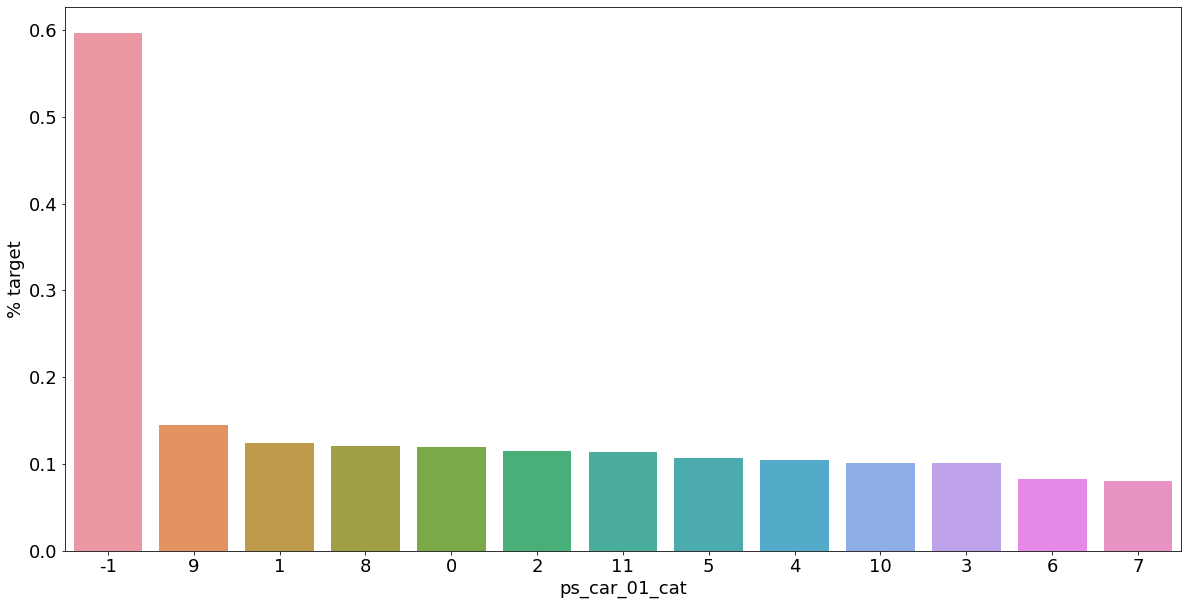

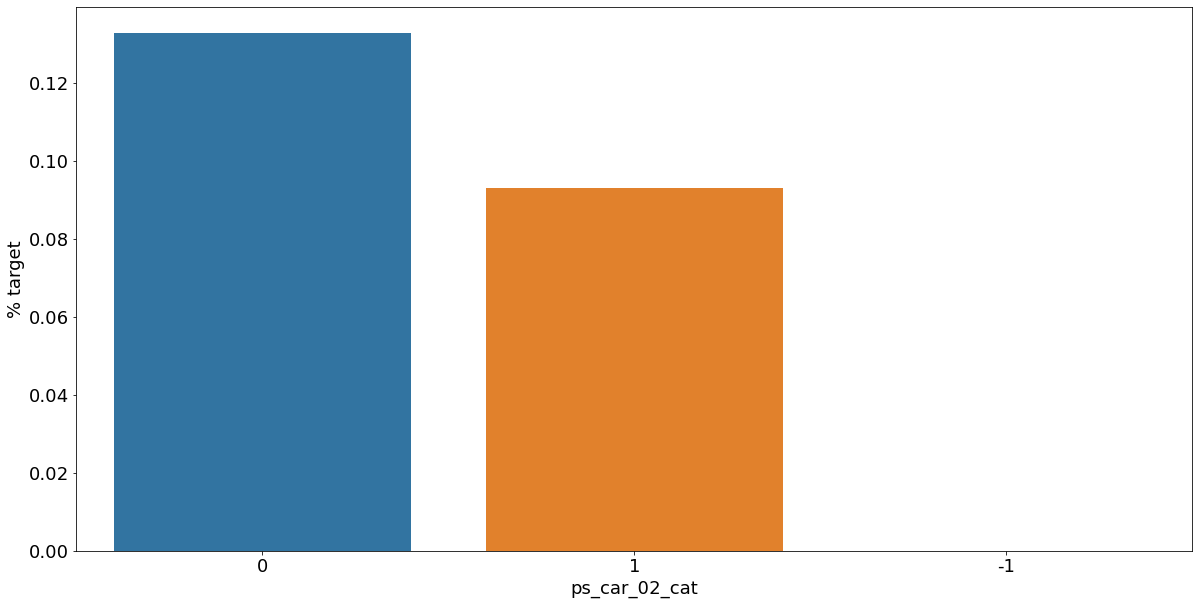

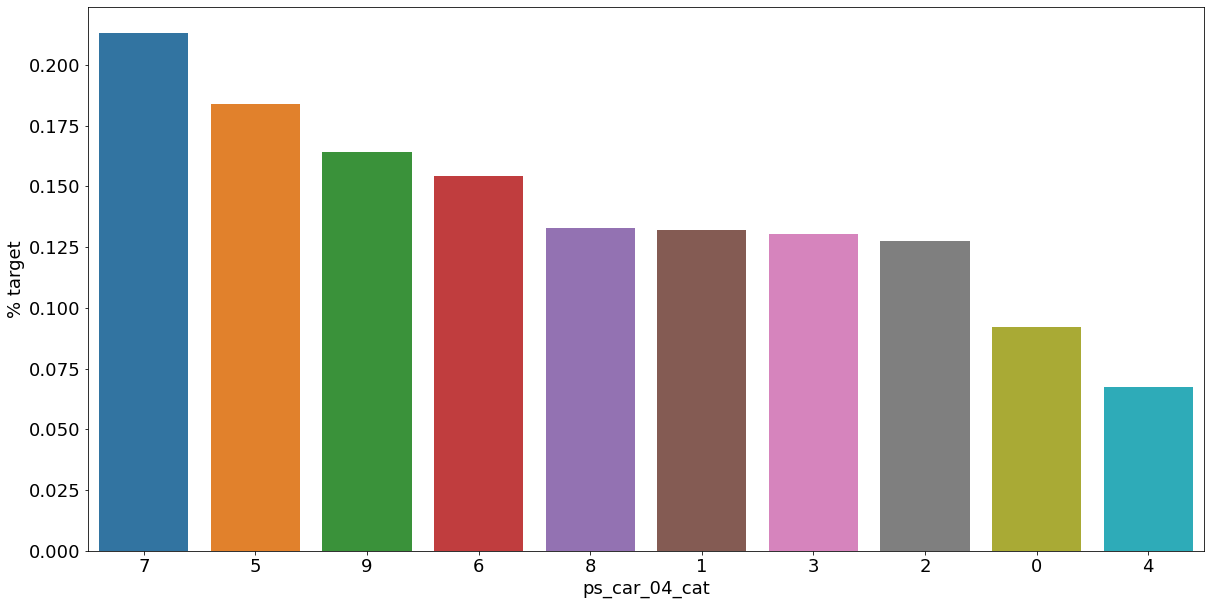

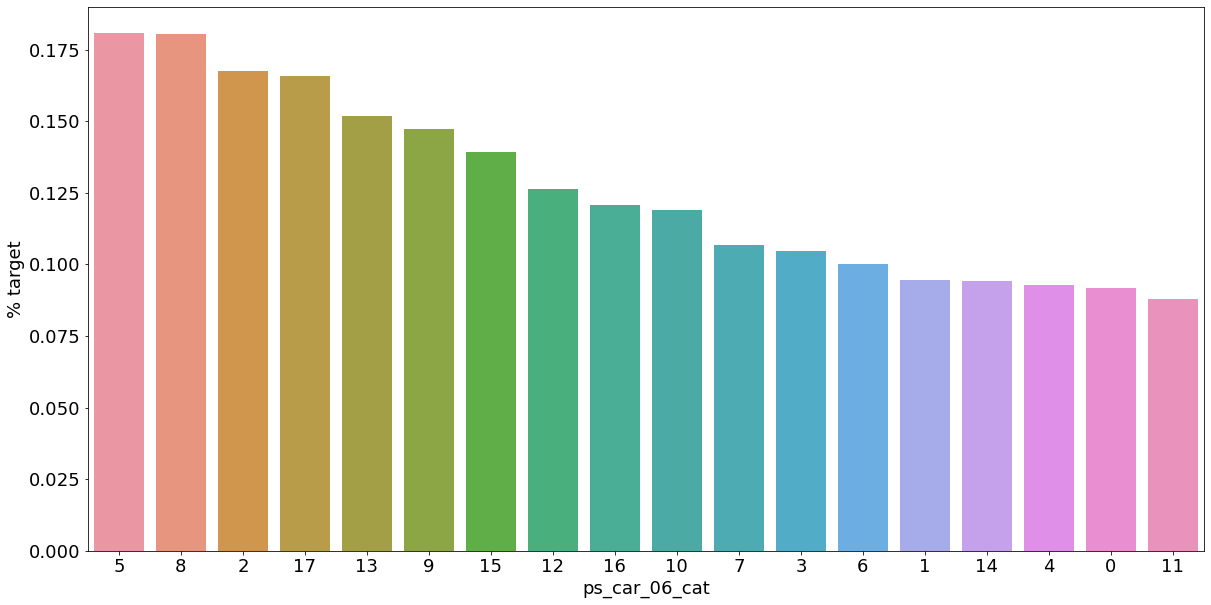

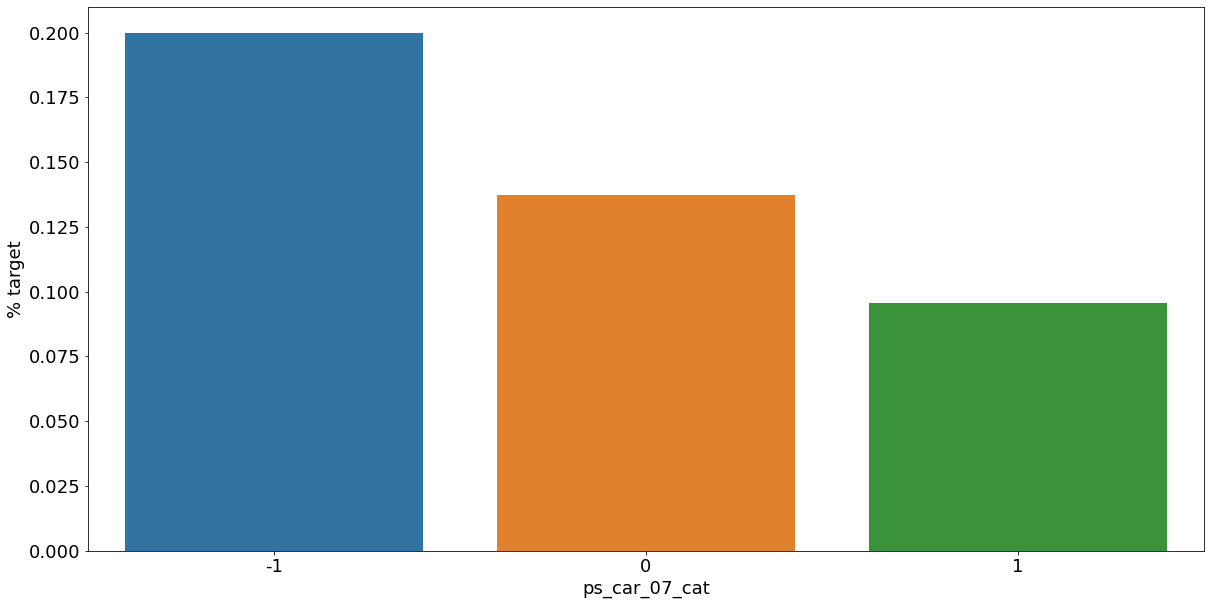

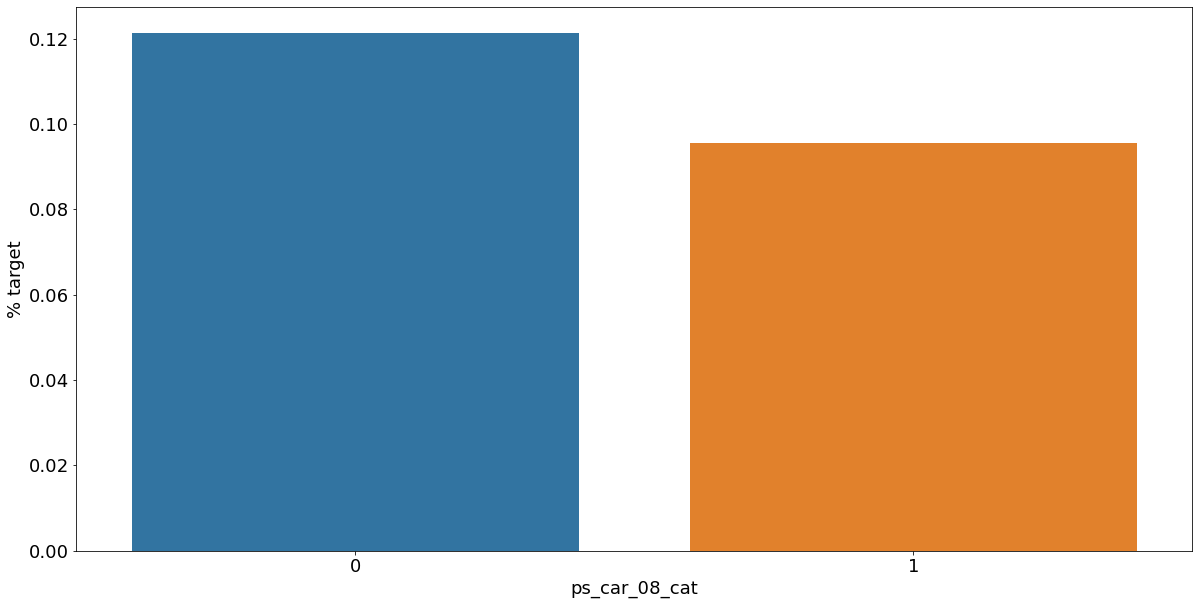

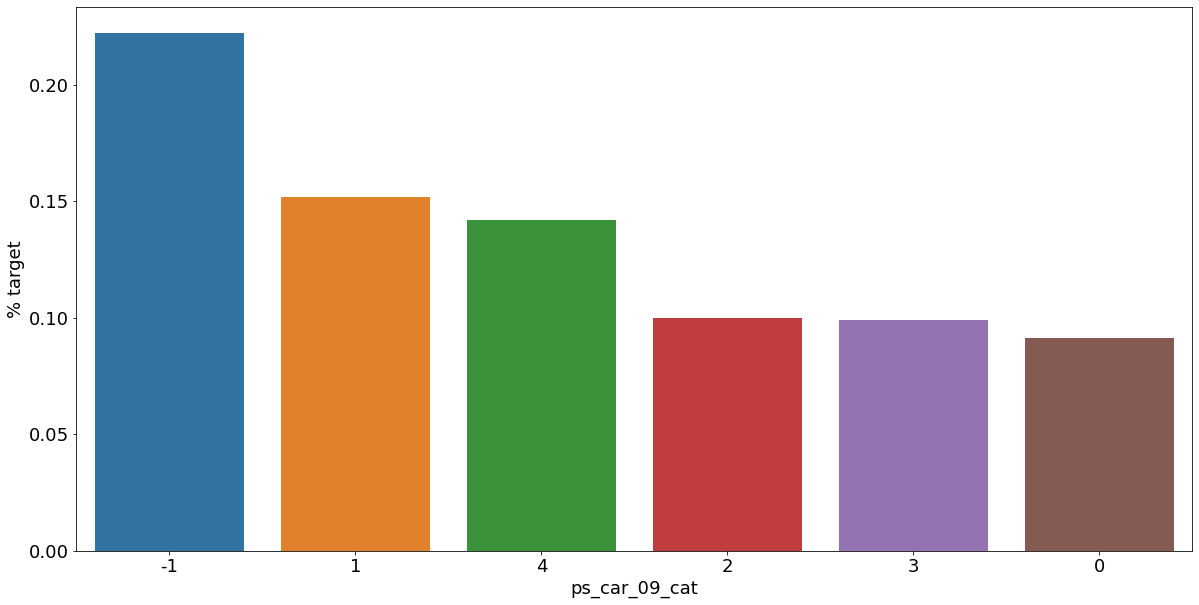

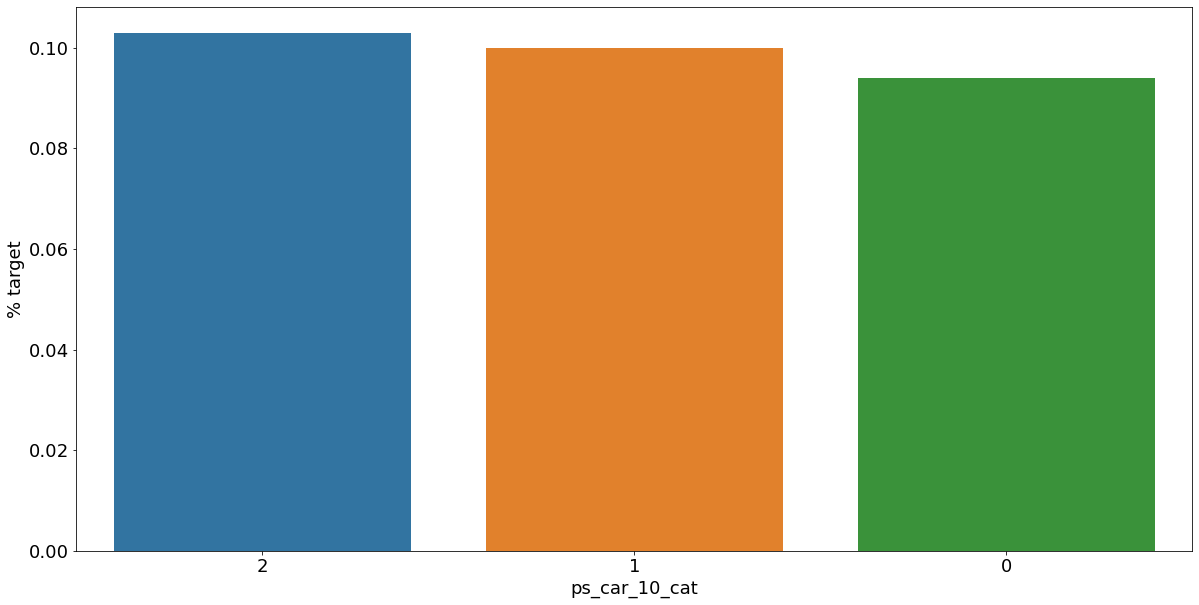

In [40]:
#앞서 meta를 만들어뒀기 때문에 예측에 사용할 feature, 그리고 categorical feature를 쉽게 불러올 수 있습니다
v = meta[(meta.level == 'nominal') & meta.keep].index

for f in v:
    fig, ax = plt.subplots(figsize = (20, 10))
    
    #각 categorical feature마다 target = 1의 비율을 계산합니다.
    cat_perc = train[[f, 'target']].groupby([f], as_index = False).mean()
    cat_perc.sort_values(by = 'target', ascending = False, inplace = True)
    
    #Bar plot을 사용합니다.
    #Target mean값에 따라 내림차순으로 plot이 그려집니다.
    sns.barplot(ax = ax, x = f, y = 'target', data = cat_perc, order = cat_perc[f])
    plt.ylabel('% target', fontsize = 18)
    plt.xlabel(f, fontsize = 18)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
    plt.show();
    

꽤 많은 feature에서 missing value가 많은 portion을 차지하는 것을 볼 수 있습니다. 따라서 missing value를 다른 값으로 대체하기보다 그 자체를 하나의 독립된 category value로 두는 것이 나을 수 있습니다. Missing value를 가진 고객의 target = 1인 비율이 꽤 높습니다.

### Interval features

이번에는 interval variable간 correlation을 확인합니다. Heatmap을 사용합니다.

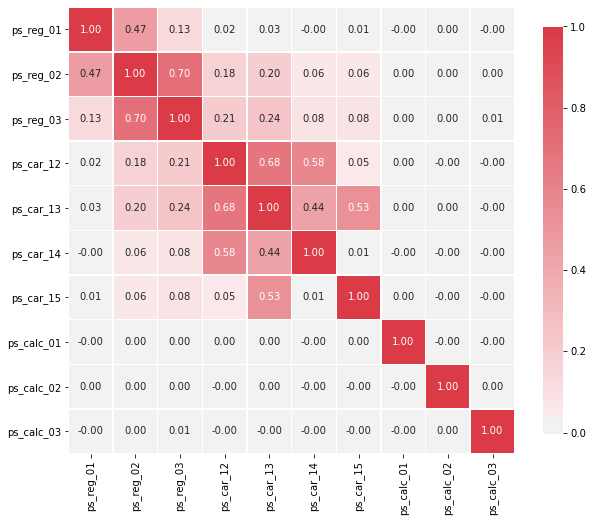

In [42]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    #Color map을 생성합니다.
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    
    fig, ax = plt.subplots(figsize = (10, 10))
    sns.heatmap(correlations, cmap = cmap, vmax = 1.0, center = 0, fmt = '.2f',
                square = True, linewidths = .5, annot = True, cbar_kws = {'shrink': .75})
    plt.show()
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

강한 correlation을 보이는 features를 찾을 수 있습니다.
 - ps_reg_02, ps_reg_03(0.70)
 - ps_car_12, ps_car_13(0.68)
 - ps_car_12, ps_car_14(0.58)
 - ps_car_13, ps_car_15(0.53)
 
두 feature 간 관계를 보기 위해 seaborn의 pairplot을 사용할 수 있습니다. 여기서는 이미 heatmap을 통해 feature 간 correlation을 알아봤기 때문에, lmplot을 통해 두 feature 간 회귀 판단을 해보도록 합니다.

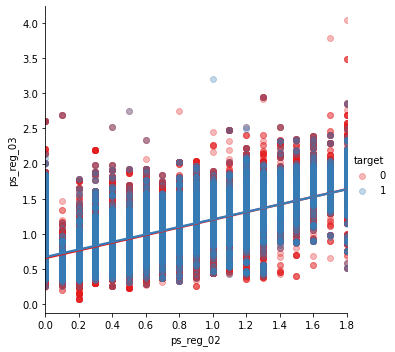

In [44]:
sns.lmplot(x = 'ps_reg_02', y = 'ps_reg_03', data = train, hue = 'target',
           palette = 'Set1', scatter_kws = {'alpha': 0.3})
plt.show()

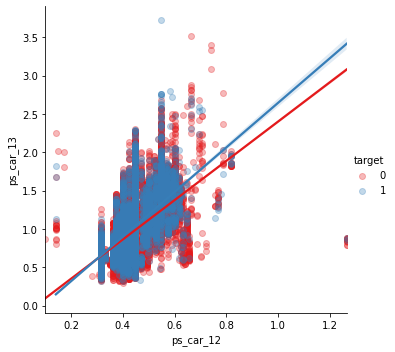

In [46]:
sns.lmplot(x = 'ps_car_12', y = 'ps_car_13', data = train, hue = 'target',
           palette = 'Set1', scatter_kws = {'alpha': 0.3})
plt.show()

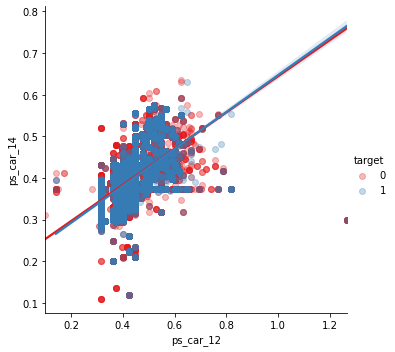

In [47]:
sns.lmplot(x = 'ps_car_12', y = 'ps_car_14', data = train, hue = 'target',
           palette = 'Set1', scatter_kws = {'alpha': 0.3})
plt.show()

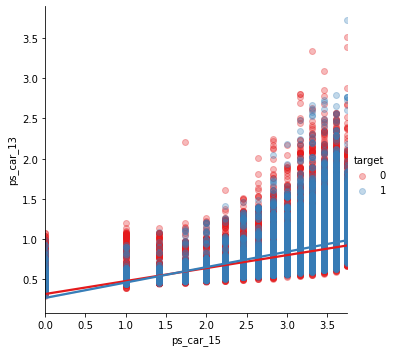

In [49]:
sns.lmplot(x = 'ps_car_15', y = 'ps_car_13', data = train, hue = 'target',
           palette = 'Set1', scatter_kws = {'alpha': 0.3})
plt.show()

어떻게 correlated features를 keep할 수 있을까요? PCA를 사용할 수도 있습니다. 다음은 원작자가 "AllState Claims Severity Competition"에서 PCA를 사용해 만든 kernal입니다.
https://www.kaggle.com/bertcarremans/reducing-number-of-numerical-features-with-pca

여기서는 correlated feature가 적기 때문에, PCA를 사용할 경우 heavy-fitting이 일어날 수도 있다고 하네요.

### Ordincal Features

마지막으로 ordinal features의 heatmap을 확인해봅시다.

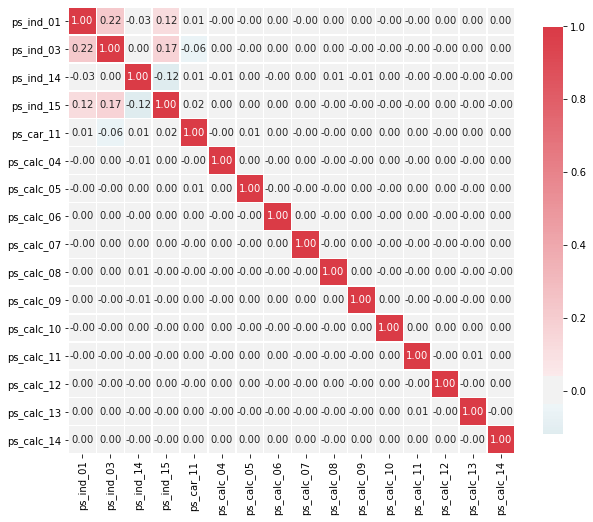

In [51]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

여기서는 correlation을 찾기 힘듭니다. 대신, target값으로 grouping할 때 분포가 어떻게 되는지는 살펴볼 수 있을 것 같습니다.

## Feature Engineering

### Creating dummy variables

Categorical feature를 encoding할 때, encoding된 값의 크기는 순서나 중요도를 의미하는 것이 아닙니다. 하지만 그 값을 그대로 model에 집어넣으면 문제가 발생할 수 있습니다. 이를 막기 위해 dummy variable을 만들어줍니다. 

In [53]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

print("Dummification 전, train 내 {}개 variable 존재".format(train.shape[1]))
train = pd.get_dummies(train, columns = v, drop_first = True)
print("Dummification 후, train 내 {}개 variable 존재".format(train.shape[1]))

Dummification 전, train 내 57개 variable 존재
Dummification 후, train 내 109개 variable 존재


### Creating interaction variables

Train set에 extra interaction variables를 추가합니다. Feature interaction에 대해서는 현재 듣고 있는 Coursera 강의 수강 이후에 추가하도록 하겠습니다.

In [56]:
v = meta[(meta.level == 'interval') & (meta.keep)].index

poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns = poly.get_feature_names(v))
interactions.drop(v, axis = 1, inplace = True) #Original columns를 제거합니다.

#Interaction variables를 train data에 concat합니다.
print("Interaction 생성 전, train 내 {}개 variable 존재".format(train.shape[1]))
train = pd.concat([train, interactions], axis = 1)
print("Interaction 생성 후, train 내 {}개 variable 존재".format(train.shape[1]))

Interaction 생성 전, train 내 109개 variable 존재
Interaction 생성 후, train 내 164개 variable 존재


## Feature Selection

### Removing features with low or zero variance

원작자는 classifier algorithm에 어떤 feature를 선택할 지 맡기는 것을 선호한다고 합니다만, 우리가 스스로 할 수 있는 일이 있습니다. Variance가 매우 낮거나 0인 feature를 제거하는 것입니다. Sklearn은 "VarianceThreshold"라는 메서드를 통해 이를 쉽게 할 수 있게 해줍니다. Default는 varience = 0인 feature를 제거합니다.

앞선 단계에서 zero-variance인 feature는 없는 것을 확인햇습니다만, 1% 이하 variance를 가지는 feature를 제거하면, 총 31개의 feature를 제거할 수 있습니다.

In [57]:
selector = VarianceThreshold(threshold = .01)
selector.fit(train.drop(['id', 'target'], axis = 1)) #id. target은 제외합니다.

f = np.vectorize(lambda x : not x) #Boolean array element를 toggle하기 위한 함수입니다.

v = train.drop(['id', 'target'], axis = 1).columns[(f(selector.get_support()))]

print("{}개의 매우 낮은 variance를 가진 feature를 제거합니다.".format(len(v)))
print("해당 feature : {}".format(list(v)))

29개의 매우 낮은 variance를 가진 feature를 제거합니다.
해당 feature : ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_0', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


더 많은 feature를 날려버릴 수 있지만, 많은 feature를 가지고 있는 상황이 아니기 때문에 이후부터는 classifier에 맡기도록 합니다. 이를 통해 processing time을 절약할 수 있습니다.

Sklearn은 다른 feature selection method를 추가로 제공합니다.이들 중 하나는 "SelectFromModel"인데, classifier가 best features를 고르고 이후 해당 features로 계혹하는 것입니다. 다음 코드에서 Random Forest를 통해 어떻게 SelectFromModel이 작동하는지 보도록 합시다.

### Selecting features with a Random Forest and SelectFromModel

Feature importance를 manually하게 지정할 수 있습니다만, 여기서는 50%로 해 보도록 합시다. 아래 코드는 다음 github에서 가져온 코드입니다.
https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch04/ch04.ipynb


In [60]:
X_train = train.drop(['id', 'target'], axis = 1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42, n_jobs = -1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021181
 2) ps_car_13^2                    0.017337
 3) ps_car_12 ps_car_13            0.017239
 4) ps_car_13                      0.017232
 5) ps_reg_03 ps_car_13            0.017133
 6) ps_car_13 ps_car_14            0.017112
 7) ps_reg_01 ps_car_13            0.016899
 8) ps_car_13 ps_car_15            0.016733
 9) ps_reg_03 ps_car_14            0.016249
10) ps_reg_03 ps_car_12            0.015635
11) ps_reg_03 ps_car_15            0.015086
12) ps_car_14 ps_car_15            0.014954
13) ps_car_13 ps_calc_01           0.014777
14) ps_reg_02 ps_car_13            0.014724
15) ps_car_13 ps_calc_03           0.014694
16) ps_reg_01 ps_reg_03            0.014639
17) ps_car_13 ps_calc_02           0.014606
18) ps_reg_01 ps_car_14            0.014326
19) ps_reg_03^2                    0.014263
20) ps_reg_03                      0.014178
21) ps_reg_03 ps_calc_02           0.013787
22) ps_reg_03 ps_calc_01           0.013769
23) ps_reg_03 ps_calc_03        

RandomForestClassifier를 돌려본 결과, 위와 같은 feature importances를 확인할 수 있습니다.이제 SelectFromModel을 통해 상위 50%만 선택해봅시다.

In [61]:
sfm = SelectFromModel(rf, threshold = 'median', prefit = True)

print("Selection 이전 features: {}개".format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print("Selection 이후 features: {}개".format(n_features))

selected_vars = list(feat_labels[sfm.get_support()])

train = train[selected_vars + ['target']]

Selection 이전 features: 162개
Selection 이후 features: 81개


## Feature Scaling

마지막으로, training set에 대해 scaling을 수행해야 합니다. 어떤 classifier는 이 scaling에 민감하게 반응합니다.

In [63]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis = 1))

array([[-0.96267817, -0.52496987, -0.64281526, ..., -0.72636977,
         0.33840411,  1.95902633],
       [-0.96267817,  1.69137659, -0.3606316 , ...,  0.28196561,
         1.68508184,  1.95902633],
       [ 2.0596649 ,  0.95259444,  0.20373572, ..., -0.12883769,
        -1.00827361, -1.05963336],
       ...,
       [-0.96267817,  0.58320336,  0.48591938, ..., -0.46494948,
         0.18877325,  0.28199317],
       [-0.96267817, -0.89436094, -1.48936624, ..., -0.91309854,
        -0.40975018,  0.28199317],
       [-0.45895433, -1.26375202,  1.61465401, ...,  0.28196561,
        -0.11048846, -0.72422673]])